PROJECT 2

PART (1) QUESTION (1.1) There are 4039 Nodes and 88234 Edges

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install python-igraph==0.9.6
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-igraph: filename=python_igraph-0.9.6-cp310-cp310-linux_x86_64.whl size=2555548 sha256=4411972fdca2092bb02273a4d18eda13e33b0f22f566ba7539bef358b4142473
  Stored in directory: /root/.cache/pip/wheels/ef/14/e6/4f7a42ad0b6bbf5eb65c6358c608065dd3646c2c3b01561e84
Successfully built python-igraph
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cairocffi: filename=cairocffi-1.5.1-py3-none-any.whl size=90535 sha256=e4c9c0840ce36a2

In [3]:
import igraph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

PART (1) QUESTION (1.2) The graph is connected:

In [4]:
path = '/content/gdrive/MyDrive/Colab Notebooks/232/Project_2/facebook_combined.txt'

# Load file
data = np.loadtxt(path, dtype=int)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['source', 'target'])

# Create graph
g = igraph.Graph.DataFrame(df, directed=False)

# Print the graph summary
print(g.summary())

IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)


In [5]:
# Check if the graph is connected
if g.is_connected():
    print("The graph is connected!")
else:
    print("The graph is not connected!")
        # Get the size of the GCC
    gcc = g.clusters().giant()
    print("The size of the GCC is:", gcc.vcount())

The graph is connected!


PART 1 QUESTION (2)

In [6]:
# Find the diameter of the graph
diameter = g.diameter()
print("The diameter of the graph is:", diameter)

The diameter of the graph is: 8


PART 1 QUESTION (3)

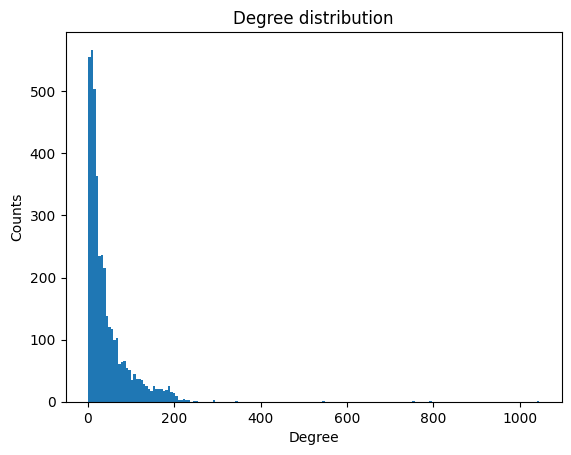

The average degree of the graph is: 43.69101262688784


In [7]:
# Compute the degree of each vertex in the graph
degree = g.degree()

# Compute the degree distribution
degree_dist = g.degree_distribution()

# Plot the degree distribution
plt.hist(degree, 'auto')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

# Report the average degree
avg_degree = sum(degree) / len(degree)
print("The average degree of the graph is:", avg_degree)

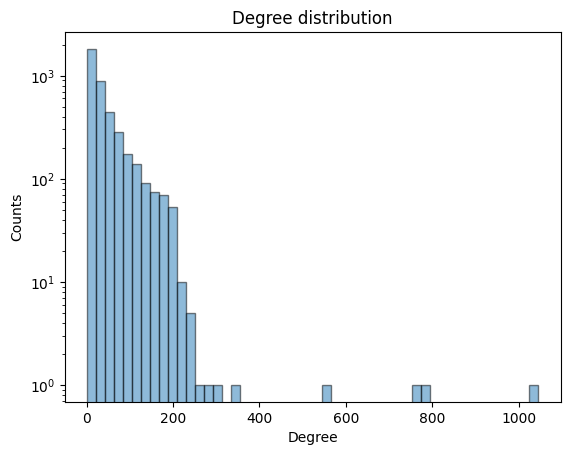

The slope of the linear fit is:  -0.21303107322226497
slope is  -0.2130310732222649


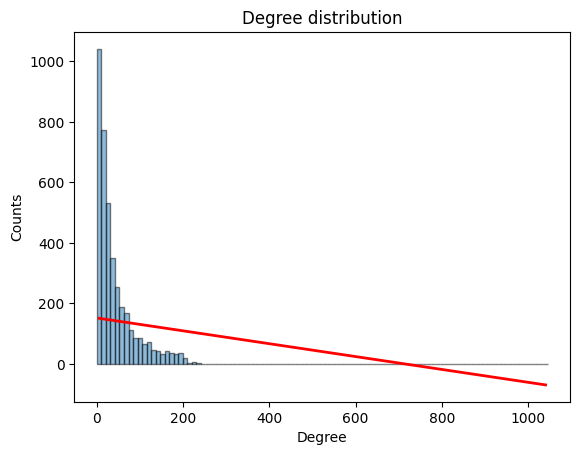

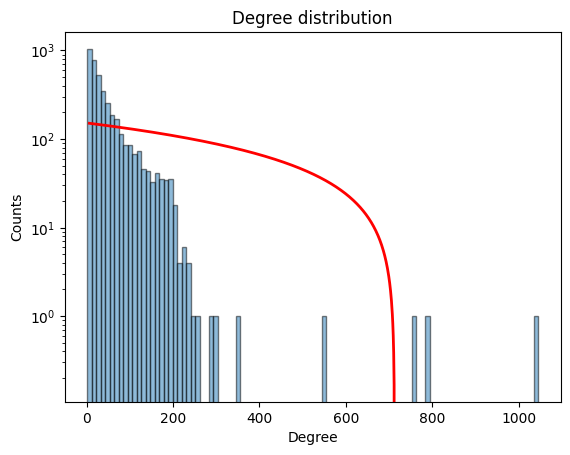

In [8]:
# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=50, log=True, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=100, log=False, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')

# Fit a linear model to the log-transformed data
x = bins[:-1] + np.diff(bins) / 2
y = counts
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
print("The slope of the linear fit is: ", slope)

# Plot the linear fit
xfit = np.linspace(min(x), max(x), 1000)
yfit = slope * xfit + intercept
plt.plot(xfit, yfit, 'r-', lw=2)

# recheck slope
slope = (yfit[100] - yfit[0])/(xfit[100]-xfit[0])
print('slope is ',slope)

plt.show()

# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=100, log=True, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')

plt.plot(xfit, yfit, 'r-', lw=2)

plt.show()

-----------------PART 2--------------------------------

PART 2 QUESTION (5)

In [9]:
node_id = 0
node_neighbors = g.neighbors(node_id)
node_neighbors.append(node_id)
personalized_network = g.induced_subgraph(node_neighbors)

print(personalized_network.summary())

IGRAPH UN-- 348 2866 -- 
+ attr: name (v)


There are 348 Nodes, and 2866 Edges.

PART 2 QUESTION (6)

In [10]:
diameter = personalized_network.diameter()
print(diameter)

2


The upper bound of the diameter is 2, since the network is defined as a node and it's immediate neighbors, then any 2 nodes will be connected by at most 2 edges through node 0.

For the lower bound, if node 0 is connected to all of its neighbors and all of its neighbors are connected to each other, then the lower bound of the diameter is 1.

PART 2 QUESTION (7)

For the upper bound, this would mean that their exists 2 nodes that are not connected to each other but are connected through node 0. So the shortest path between the nodes is 2 edges, making the diameter 2.

For the lower bound, it means that node 0 is directly connected to all of its neighbors, and all of its neighbors are directly connected to each other. The network would be a complete graph, and there is a direct path of length 1 between any two nodes in the personalized network.

Part 2 Question (8)

In [11]:
degrees = g.degree()

# count the number of nodes with degree greater than 200
count = 0
total_deg = 0
for degree in degrees:
    if degree > 200:
        count += 1
        total_deg+= degree
total_deg /= count

In [12]:
count

40

In [13]:
total_deg

279.375

Part 2 Question 9


In [ ]:
!apt install libcairo2-dev
!pip install pycairo

In [14]:
import matplotlib.pyplot as plt

In [ ]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcairo2-dev is already the newest version (1.16.0-4ubuntu1).
libgif-dev is already the newest version (5.1.9-1).
libgif-dev set to manually installed.
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
core_nodes = [0, 107, 348, 483, 1086]

# loop through each core node
for node in core_nodes:
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    
    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    igraph.plot(fg_clusters, layout=layout)
    igraph.plot(eb_clusters, layout=layout)
    igraph.plot(im_clusters, layout=layout)
    
    # print the modularity scores
    print(f"Core node {node_id}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

Part 2 Question 10

AttributeError: ignored

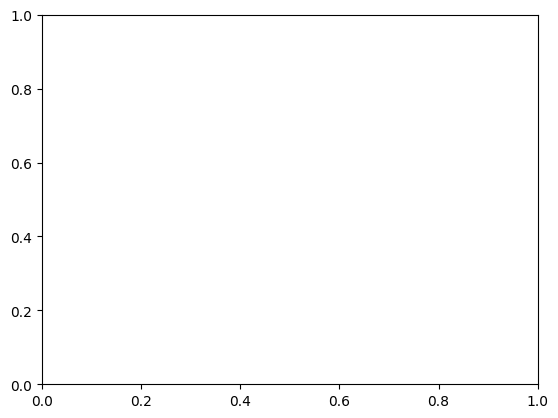

In [ ]:
core_nodes = [1, 108, 349, 484, 1087]

for node in core_nodes:
    personal_net = g.subgraph(g.neighbors(node) + [node])
    personal_net.delete_vertices(node)
        # Find the community structure of the original network
    communities_orig = personal_net.community_fastgreedy().as_clustering()
    modularity_orig = personal_net.modularity(communities_orig)

    # Remove the core node from the network and find the community structure
    #personal_net.delete_vertices(node_id)
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    
    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    igraph.plot(fg_clusters, target=f"core_node_{node_id}_fg.png", vertex_color=[fg_clusters.membership], layout=layout)
    igraph.plot(eb_clusters, target=f"core_node_{node_id}_eb.png", vertex_color=[eb_clusters.membership], layout=layout)
    igraph.plot(im_clusters, target=f"core_node_{node_id}_im.png", vertex_color=[im_clusters.membership], layout=layout)
    
    # print the modularity scores

        # Plot the community structures of the original and modified networks
    print(f"Core node {node_id}, Modified network with node {neighbor_id}:")
    print(f"Fast-Greedy modularity score (modified): {fg_modularity_mod:.3f}")
    print(f"Edge-Betweenness modularity score (modified): {eb_modularity_mod:.3f}")
    print(f"Infomap modularity score (modified): {im_modularity_mod:.3f}")

KeyError: ignored